# TEMEL BİLEŞEN ANALİZİ

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./verisetleri/Hitters.csv")
df.dropna(inplace = True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [4]:
# Verileri 2 veya 3 bileşen ile temsil edebilirmiyiz.

In [5]:
# STANDARTLAŞTIRMA İŞLEMİ

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
df = StandardScaler().fit_transform(df)

In [9]:
df[0:5, 0:5] # Beş satrı ve 5 değişkenin gözlemlenmesi

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [10]:
from sklearn.decomposition import PCA

In [11]:
# İki bileşenli dönüştürme
pca = PCA(n_components = 2)
# Veriye uygulanması
pca_fit = pca.fit_transform(df)

In [12]:
# Bileşenlerin gözlemlenmesi
# Önce dataframe dönüştürülmelidir.

In [13]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["Birinci_bileşen", "İkinci_bileşen"])

In [14]:
bilesen_df

,Birinci_bileşen,İkinci_bileşen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [15]:
# Açıklanan varyans
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

In [16]:
# Yukarıdaki sonuç : Birinci_bileşen ce veri setinin içinde bulunan değişkenliğin % 45 i açılanabilmiş. Benzer şekilde İkinci_bileşen ce veri setinin içerisinde bulunan değişkeliğin % 24 ü açılanabilmiş.
# Bu iki değeri toplarsak yaklaşık olarak % 68 gibi bir değerle veri setinin içerisindeki değişkenlik açıklanabilmiş olur. İyi bir oran olarak kabul edilebilir.

In [17]:
# Bileşenlere erişmek için

In [18]:
pca.components_

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
        -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
         0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
        -0.20978299, -0.05452611]])

In [19]:
pca.components_[1]

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

### OPTIMUM BİLEŞEN SAYISINI BULMA

In [20]:
# FARKLI BİLEŞEN SAYILARINA GÖRE AÇILANAN VARYANSIN NASIL DEĞİŞTİĞİNİ İNCELEYİP BUNA GÖRE BİLEŞEN SAYISINA KARAR VERMEK

In [22]:
pca = PCA().fit(df)

In [ ]:
# cumsum() Kümülatif toplamın amacı :
# İndirilecek bileşen sayısı belirtilmezde değişken sayısı kadar yeni bileşen oluşturulur. Bu durmda değişken sayısı kadar oluşan bileşenlerin kümülatif (cumsum) toplamlarını alırsak, işte ikinci bileşene geldiğimizde birinci ile beraber düşünüldüğünde verisetindeki değişkenliğin ne kadarının açıklandığını öğrenebiliriz. Örneğin benzer şekilde veri setinin içerisindeki değişkenliğin, kümülatif olarak baktığımızda üç bileşence ne kadarının açıklandığını görebiliriz. Bu sebeple bir kümülatif toplam işlemi gerçekleştirilir.

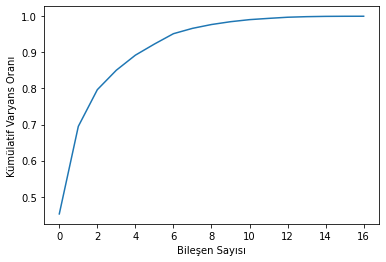

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı");

In [27]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

In [28]:
# 4 bileşenle 15 tane değişkenin verisini taşıyabiliyorsak bunu uygulayabiliriz.

In [29]:
# FİNAL VERİ SETİ

In [30]:
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [31]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])

In [32]:
# Yaklaşık olarak 3 bileşen ile % 80 verisetindeki değişkenlik açıklanabilr.

In [ ]:
# son